In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
del df["User ID"]

In [5]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
df = pd.get_dummies(df,drop_first= True)

In [7]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [8]:
X  = df.loc[:,["Age","EstimatedSalary","Gender_Male"]]


In [9]:
Y = df.loc[:,["Purchased"]].values

In [10]:
X

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [11]:
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [13]:
x = sc.fit_transform(X)

In [14]:
x

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [15]:
Y = Y.reshape(-1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_tr,X_ts,Y_tr,Y_ts = train_test_split(x,Y, random_state = 10, test_size = 0.2)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
acc_value = []
err_value = []

In [21]:
for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_tr,Y_tr)
    Y_prediction = model.predict(X_ts)
    accuracy = accuracy_score(Y_ts, Y_prediction)
    acc_value.append(accuracy)
    err_value.append(1-accuracy)

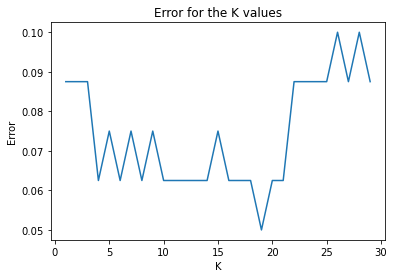

In [23]:

plt.plot(range(1,30),err_value)
plt.title("Error for the K values")
plt.xlabel("K")
plt.ylabel("Error")
plt.show()

In [27]:
model1 = KNeighborsClassifier(n_neighbors = 19)
model1.fit(X_tr, Y_tr)
Y_prediction1 = model1.predict(X_ts)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(Y_ts,Y_prediction1)

array([[49,  3],
       [ 1, 27]], dtype=int64)

In [30]:
accuracy_score(Y_ts,Y_prediction1)

0.95

In [31]:
import pickle

In [32]:
file = open("KNN.pkl", "wb")

In [33]:
pickle.dump(model1, file)